In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.DataFrame(data=list(np.random.rand(1,101)), columns=map(lambda x: 'col_' + str(x), range(101)))

y = (data.values).reshape(-1)
x = range(len(y))

m, c = np.polyfit(x, y, 1)

fit_y = list(map(lambda x: m*x + c, x))

plt.plot(x, y, "ro")
plt.plot(x, fit_y)

xlabels = [data.columns[i] for i in range(0, 101, 20)]

plt.xticks(range(0, 101, 20), xlabels)

In [ ]:
display(data)

In [ ]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))

ts = ts.cumsum()

ts.plot();

In [ ]:
def poly(fit: list[int], data: list[int]) -> list[int]:
    return list(map(lambda x: sum([f*(x**(len(fit)-i-1)) for i,f in enumerate(fit)]), data))

num = 1001
step = 100

in_data = np.array(list(map(lambda x: x*np.random.randint(1,20) if x > 0 else x**2, np.sin(np.linspace(-10*np.pi, 10*np.pi, num))))).reshape(1, num)
print(in_data.shape)
data = pd.DataFrame(data=in_data, columns=map(lambda x: 'col_' + str(x), range(num)))

y = (data.values).reshape(-1)
x = range(len(y))

pfit = np.polyfit(x, y, deg=100)

fit_y = poly(pfit, x) #list(map(lambda x: a*(x**5) + b*(x**4) + c*(x**3) + d*(x**2) + e*x + f, x))

plt.plot(x, y,)
plt.plot(x, fit_y)

xlabels = [data.columns[i] for i in range(0, num, step)]

plt.xticks(range(0, num, step), xlabels, rotation=-90)

In [61]:
def graph(n: int, wsizes: list[int]):
    x = list(map(lambda y: y/10, range(0, n*10)))
    y = list(map(lambda z: z + (np.random.random()*2 - 1), np.sin(x)))

    dims = int(np.ceil(np.sqrt(len(wsizes))))
    fig, ax = plt.subplots(dims-1,dims)
    

    for z, wsize in enumerate(wsizes):
        r = int(np.floor(z/dims))
        c = z - r*dims

        ax[r, c].plot(x,y,"r.")
        avg_y = [(sum(y[int(i):int(i)+wsize])/len(y[int(i):int(i)+wsize]) if i+wsize < len(y)+2 else y[int(i)]) for i in range(0,len(y))]

        ax[r, c].plot(x, avg_y, label="avg ws=" + str(wsize))

        avg_y2 = []
        idx = 0
        while idx < n*10:
            last_idx = idx+wsize if idx+wsize < n*10 else len(y)
            avg = sum(y[idx:last_idx])/len(y[idx:last_idx])
            avg_y2.append(avg)
            idx += wsize
            if idx >= n*10 and len(y[last_idx: len(y)]) > 0:
                avg = sum(y[last_idx: len(y)])/len(y[last_idx: len(y)])
                avg_y2.append(avg)

        ax[r, c].plot(np.linspace(0,n, len(avg_y2)), avg_y2, label="wsize=" + str(wsize))

        # ax[r, c].legend()
        ax[r, c].set_title(str(wsize))
    # for i in np.linspace(0, n*10, int(n*10/wsize)):
    #     plt.plot([i/10]*2, [2, -2], "g--")

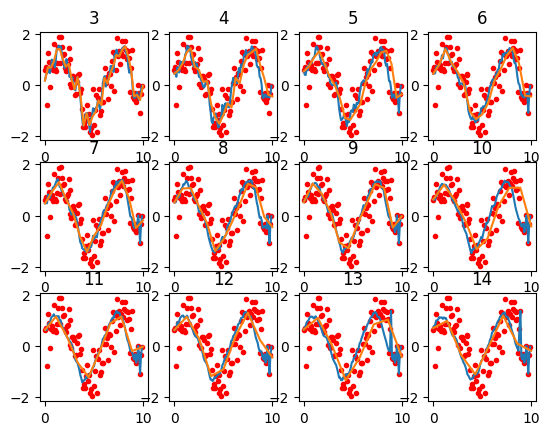

In [62]:
nums = range(10,11)# 20)
size = range(3,15)

for n in nums:
    graph(n, wsizes=size)

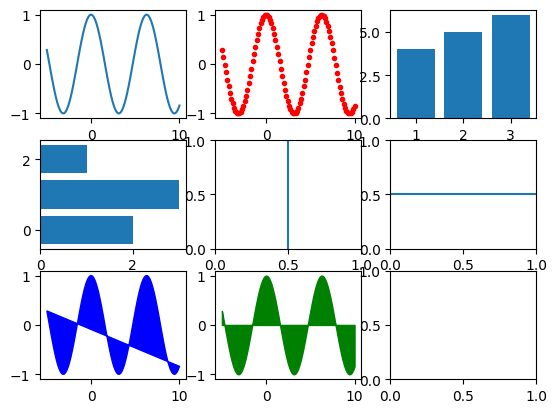

In [22]:
x = np.linspace(-5, 10, 100)
y = np.cos(x)

fig, ax = plt.subplots(3,3)
ax[0,0].plot(x, y)

ax[0,1].scatter(x, y, color="red", marker=".")

ax[0,2].bar([1,2,3],[4,5,6])

ax[1,0].barh([0,1,2],[2,3,1])

ax[1,1].axvline(0.5)

ax[1,2].axhline(0.5)

ax[2,0].fill(x, y, color="blue")

ax[2,1].fill_between(x, y, color="green")